# Curating a data set for elastic $(p,p)$ and $(n,n)$ scattering for multiple isotopes

 We will make use of the class `MulltiQuantityReactionData` class in `exfor_tools.curate`

In [1]:
import numpy as np
from periodictable import elements

from exfor_tools import curate, quantities

Using database version x4i3_X4-2023-04-29 located in: /mnt/ffs24/home/beyerkyl/local_conda_pkgfiles/envs/exft/lib/python3.14/site-packages/x4i3/data


In [2]:
from exfor_tools import ExforEntry

In [3]:
from jitr.reactions import reaction

In [4]:
#NBVAL_CHECK_OUTPUT
entry = ExforEntry(
    entry="E1677",
    reaction=reaction.ElasticReaction(
        target=(40,20),
        projectile=(1,1)
    ),
    quantity="dXS/dRuth",
    vocal=True
)

Found subentry E1677016 with the following columns:
['EN', 'ANG-CM', 'DATA', '+DATA-ERR', '-DATA-ERR']


In [5]:
print(quantities)

['dXS/dA', 'dXS/dRuth', 'Ay', 'XS']


In [6]:
Ca48 = (48, 20)
Ca40 = (40, 20)

neutron = (1, 0)
proton = (1, 1)

In [7]:
energy_range = [10, 200]
min_num_points = 5

# if normalization uncertainty isn't reported assign it to be 5%
default_systematic_normalization_err = 0.05

settings = {
    "Einc_range": energy_range,
    "filter_kwargs": {"min_num_pts": min_num_points},
}

## EXFOR querying and parsing

In [8]:
pp_data = {
    target: curate.MultiQuantityReactionData(
        reaction.ElasticReaction(target=target, projectile=proton),
        quantities=["dXS/dA", "dXS/dRuth"],
        settings=settings,
        vocal=True,
    )
    for target in [Ca40, Ca48]
}


Now parsing dXS/dA for 40-Ca(p,el)

Found subentry C0076002 with the following columns:
['E-RSL', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry C0078002 with the following columns:
['EN-ERR', 'EN-RSL-FW', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Failed to parse subentry C0624002:
	Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
Found subentry C0893002 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry E0166012 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E0249002 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'E-RSL', 'ANG-ERR', 'ANG-CM', 'ANG-RSL', 'DATA-CM', 'DATA-ERR']
Found subentry E0795002 with the following columns:
['EN', 'ANG-CM', 'DATA']
Found subentry O0032002 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Found subentr

In [9]:
nn_data = {
    target: curate.MultiQuantityReactionData(
        reaction.ElasticReaction(target=target, projectile=neutron),
        quantities=["dXS/dA"],
        settings=settings,
        vocal=True,
    )
    for target in [Ca40, Ca48]
}


Now parsing dXS/dA for 40-Ca(n,el)

Found subentry 12785002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 12996002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA', 'DATA-ERR']
Found subentry 13946003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'ERR-S', 'ERR-SYS']
Found subentry 14303002 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 4 entries
Failed to parse 0 entries:


Now parsing dXS/dA for 48-Ca(n,el)

Found subentry 14303004 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303005 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 1 entries
Failed to parse 0 entries:



Wow, that's a lot of information! 

## Let's step through the failed parses one by one:

### $^{48}$Ca

### failed parses

In [10]:
curate.print_failed_parses(nn_data[Ca48].data["dXS/dA"].failed_parses)

In [11]:
curate.print_failed_parses(pp_data[Ca48].data["dXS/dRuth"].failed_parses)

In [12]:
#NBVAL_CHECK_OUTPUT

curate.print_failed_parses(pp_data[Ca48].data["dXS/dA"].failed_parses)

Entry: C0624
C0624005  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness



In [13]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca48].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624005 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


### plotting

(-5.0, 220.0)

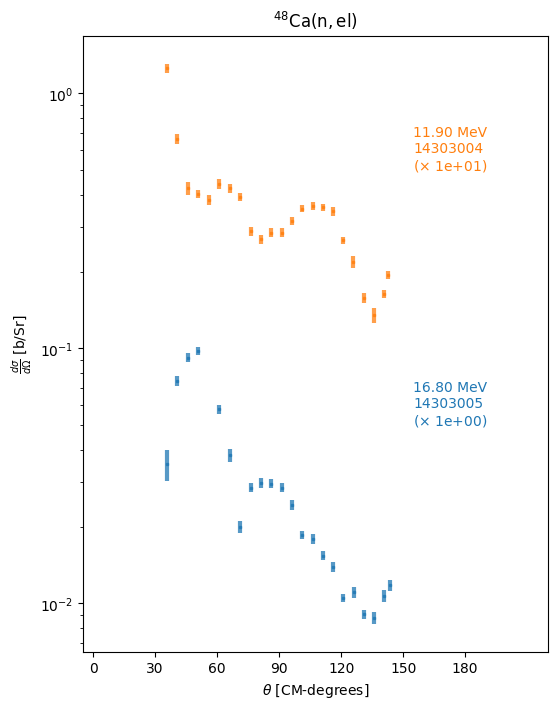

In [14]:
axes = (
    nn_data[Ca48]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.05},
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-5, 220])

(-5.0, 220.0)

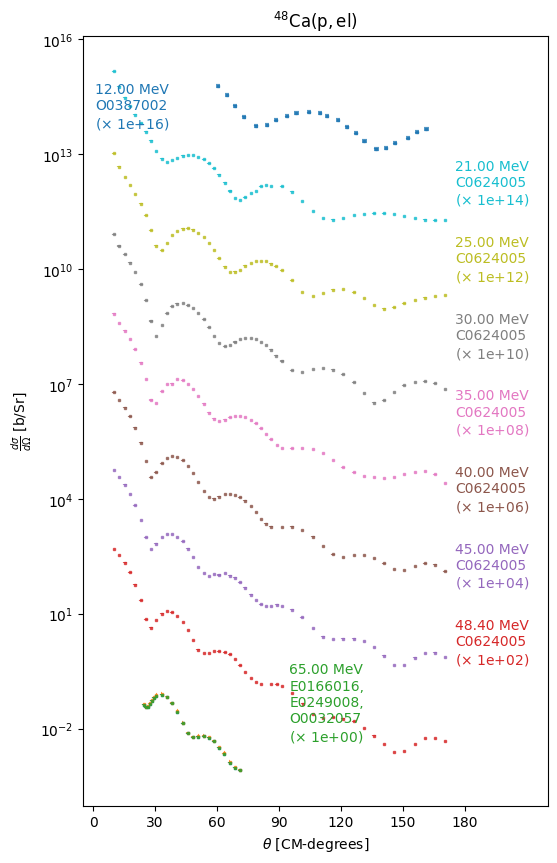

In [15]:
axes = (
    pp_data[Ca48]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.005},
        plot_kwargs={"offsets": 100},
    )
)
axes[0].set_xlim([-5, 220])

(-20.0, 220.0)

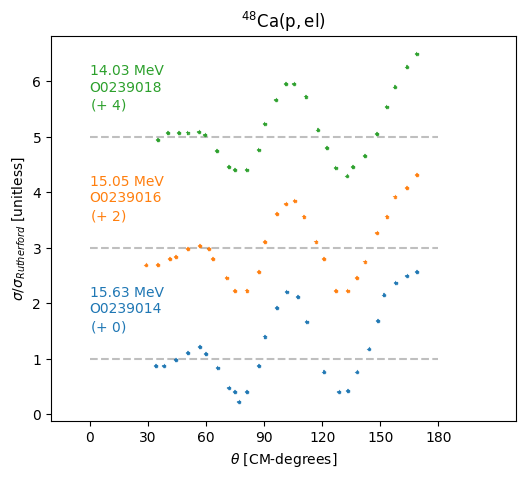

In [16]:
axes = (
    pp_data[Ca48]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1.5,
            "label_xloc_deg": 0,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 220])

## $^{40}$Ca

### handling failed parses

In [17]:
curate.print_failed_parses(nn_data[Ca40].data["dXS/dA"].failed_parses)

In [18]:
#NBVAL_CHECK_OUTPUT

curate.print_failed_parses(pp_data[Ca40].data["dXS/dRuth"].failed_parses)

Entry: O0211
O0211004  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0253
O0253026  :  Ambiguous statistical error labels:
ERR-1, ERR-2, DATA-ERR
ERR-ANALYS (ERR-1) Uncertainty of Corrections on Carbon and Oxygen
           At Forward Angles.
           (ERR-2) The Uncertainty in the Current Integration.
           The Following Uncertainties were Included in
           Calculating the Relative Errors For the Differential
           Cross Section-Uncertainties Arising from Counting
           Statistics on the Number of Counts in the Elastic Peak
           And the Number of Counts Lost Because of the Dead Time
           Of the Computer,the Uncertainty (25%) In the
           Corrections For Carbon and Oxygen at Forward Angles,
           The Uncertainty For Normalization of the Data,the
           Uncerta

In [19]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211004 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [20]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253017 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253018 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253019 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253020 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253021 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253022 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253023 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253024 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253025 with the following columns:
['ER

In [21]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "O0302",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302004 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [22]:
del pp_data[Ca40].data["dXS/dRuth"].entries["E0120"]  # no errors reported

In [23]:
#NBVAL_CHECK_OUTPUT

curate.print_failed_parses(pp_data[Ca40].data["dXS/dA"].failed_parses)

Entry: C0624
C0624002  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness

Entry: O0049
O0049

In [24]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [25]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049004 with the following columns:
['EN', 'ERR-T', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']


In [26]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142004 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [27]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253003 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253004 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253005 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253006 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253007 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253008 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253009 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253010 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']
Found subentry O0253011 with the following columns:
['ER

In [28]:
#NBVAL_CHECK_OUTPUT

pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0382",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T", "DATA-ERR"],
    },
)

Found subentry O0382002 with the following columns:
['EN', 'EN-RSL-FW', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [29]:
#NBVAL_CHECK_OUTPUT
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101002 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


### plotting and checking for data sets to be excluded

(-10.0, 180.0)

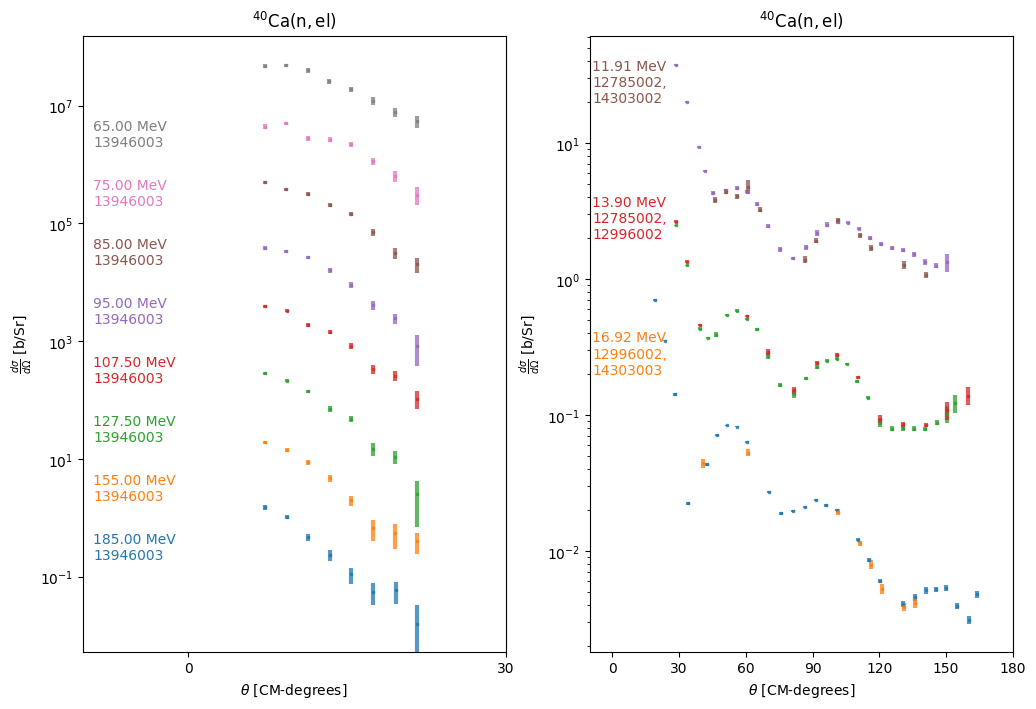

In [30]:
axes = (
    nn_data[Ca40]
    .data["dXS/dA"]
    .plot(
        n_per_plot=8,
        label_kwargs={
            "label_xloc_deg": -9,
            "label_offset_factor": 0.2,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-10, 30])
axes[1].set_xlim([-10, 180])

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

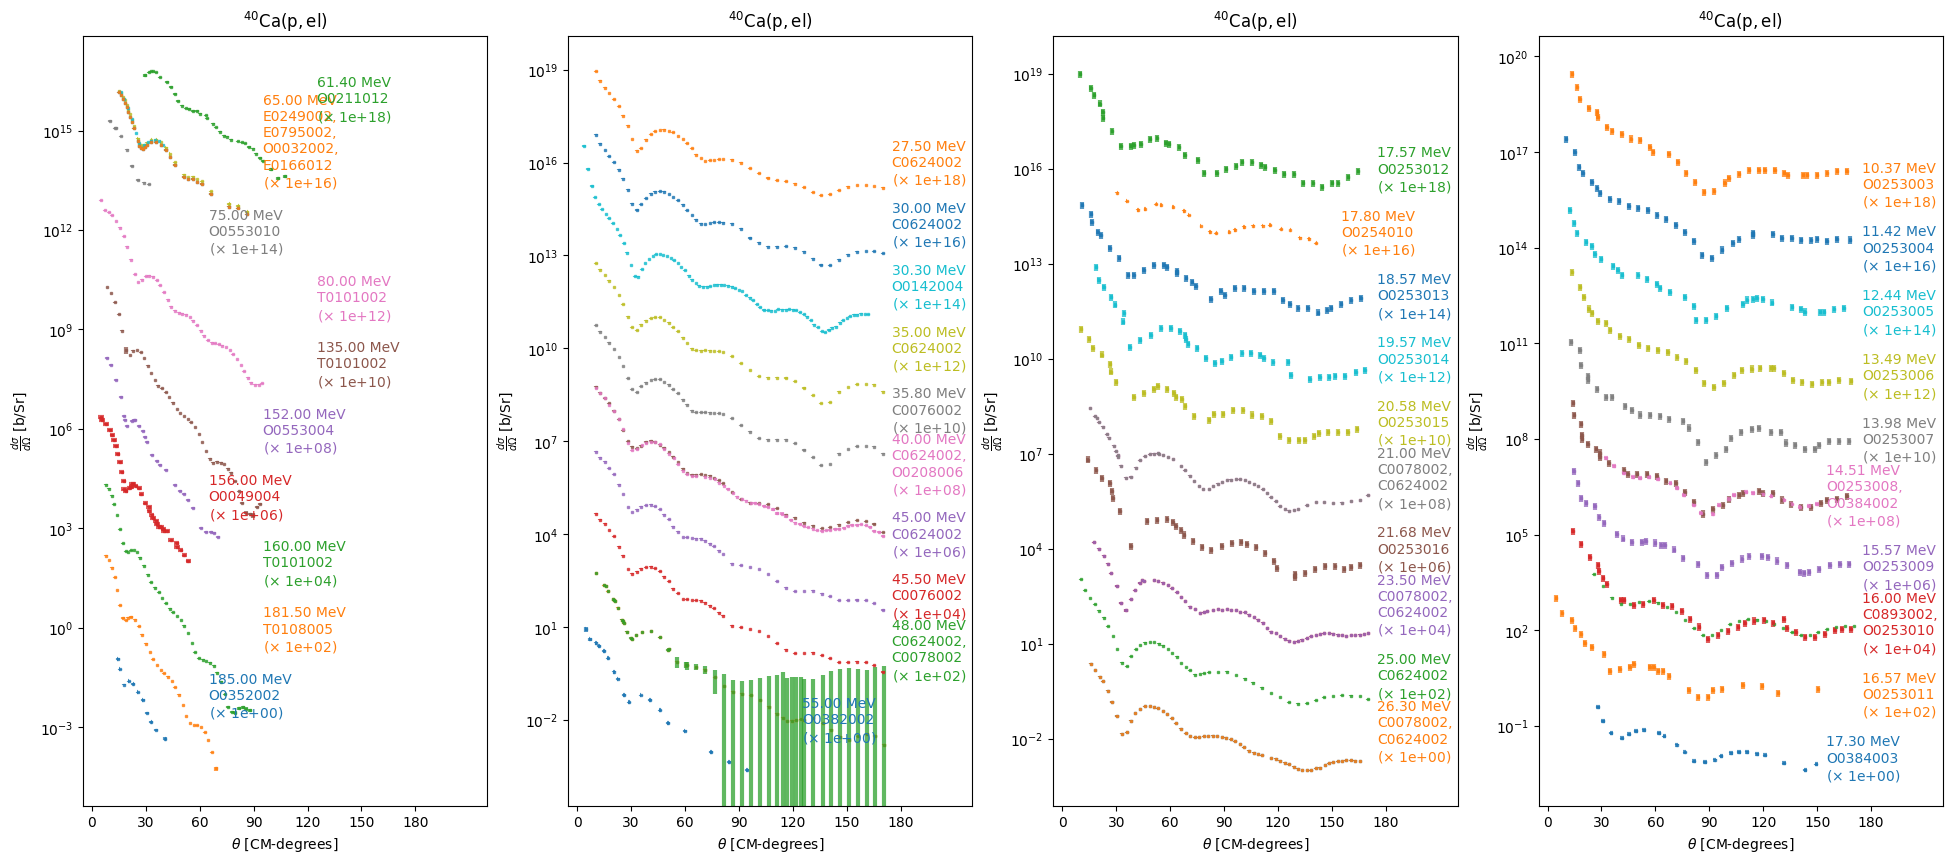

In [31]:
axes = (
    pp_data[Ca40]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

In [32]:
# Exclusions:
del pp_data[Ca40].data["dXS/dA"].entries["C0078"]  # redundant, huge uncertainties
del pp_data[Ca40].data["dXS/dA"].entries["E0795"]  # duplicate, no uncertainties
del pp_data[Ca40].data["dXS/dA"].entries["O0032"]  # duplicate to E0166 and E0249
del pp_data[Ca40].data["dXS/dA"].entries["E0249"]  # duplicate to E0166 and O0032
del pp_data[Ca40].data["dXS/dA"].entries["O0253"]
# duplicate to Rutherford from same entry, some data shows Compound Elastic effects per original paper

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

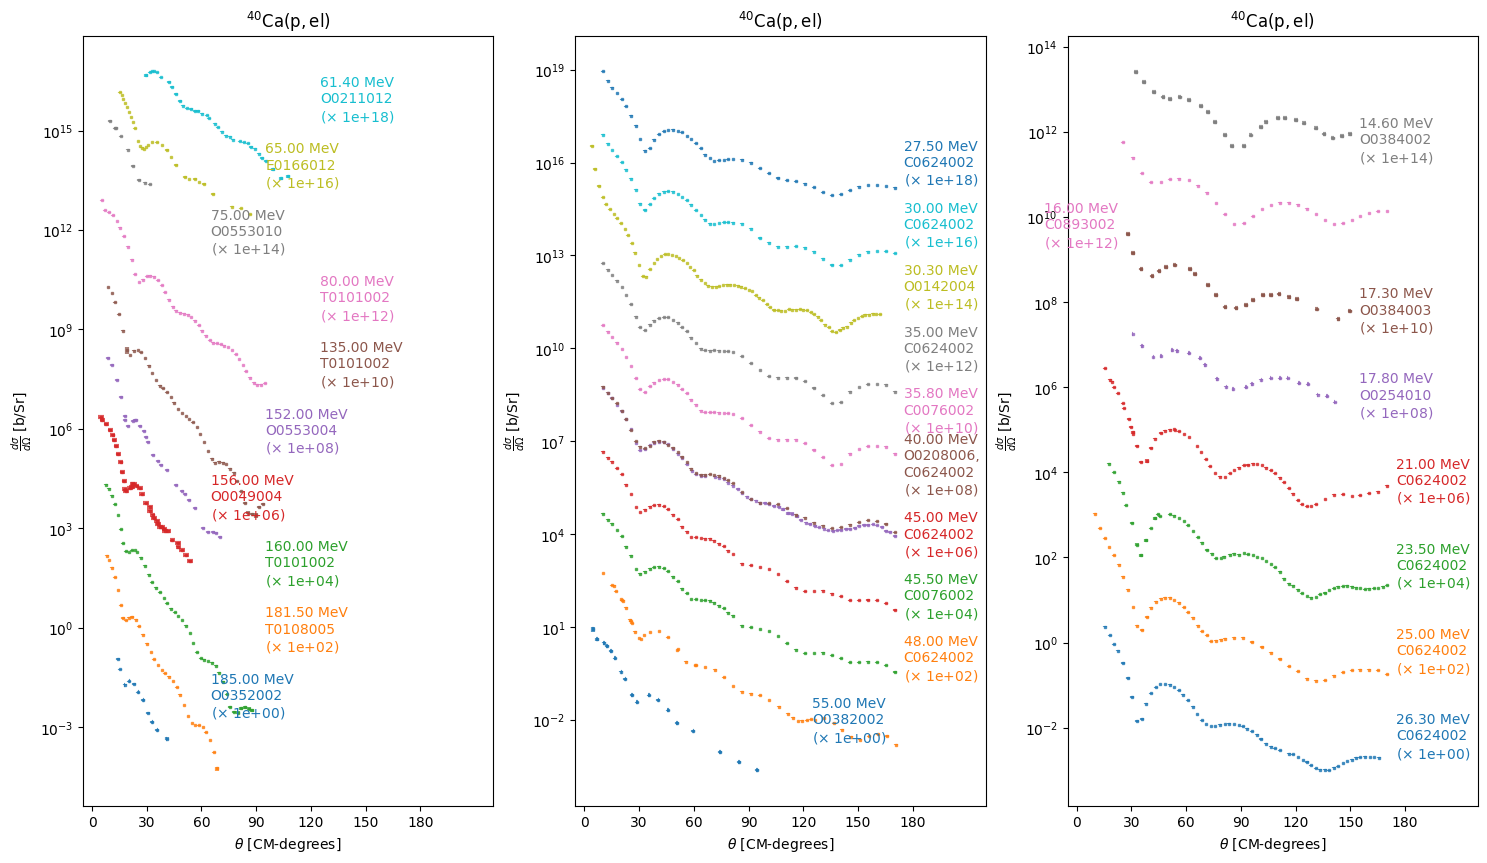

In [33]:
axes = (
    pp_data[Ca40]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

[(-5.0, 220.0), (-5.0, 220.0)]

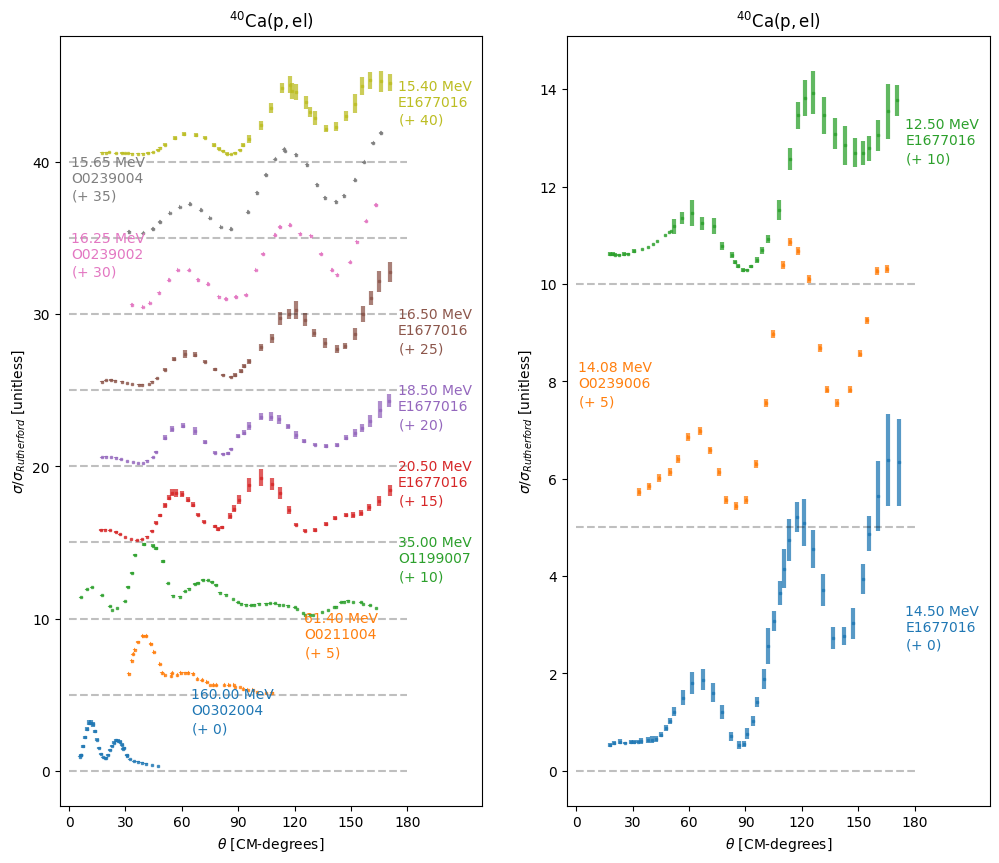

In [34]:
axes = (
    pp_data[Ca40]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=9,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 2.5,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 5, "log": False, "draw_baseline": True},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

## Now let's take a look at some attributes of the data


Now that we've removed outliers and fixed failed parses, we should re-cross-reference by entry and re-count the total number of data points:

In [35]:
#NBVAL_CHECK_OUTPUT
for quantity, data in pp_data.items():
    data.post_process_entries()
for quantity, data in nn_data.items():
    data.post_process_entries()

(40,20): found duplicates between (p,p) absolute and ratio to Rutherford in O0211
[np.float64(61.4)]
[np.float64(61.4)]


We can see how many data points and measurements we have:

In [36]:
#NBVAL_CHECK_OUTPUT
for target, data in pp_data.items():
    print(target, data.num_data_pts, data.num_measurements)

(40, 20) {'dXS/dA': 1148, 'dXS/dRuth': 465} {'dXS/dA': 28, 'dXS/dRuth': 12}
(48, 20) {'dXS/dA': 431, 'dXS/dRuth': 82} {'dXS/dA': 11, 'dXS/dRuth': 3}


In [37]:
#NBVAL_CHECK_OUTPUT
for target, data in nn_data.items():
    print(target, data.num_data_pts, data.num_measurements)

(40, 20) {'dXS/dA': 178} {'dXS/dA': 14}
(48, 20) {'dXS/dA': 45} {'dXS/dA': 2}


## We can report some aspects of our curated data like so:

In [38]:
#NBVAL_CHECK_OUTPUT
def print_report(entries):
    max_angle = 0
    min_angle = 180
    energies = []
    for entry_id, entry in entries.items():
        energies += [ m.Einc for m in entry.measurements ]
        xm = np.min([ np.min(m.x) for m in entry.measurements ])
        if xm < min_angle:
            min_angle = xm
        xm = np.max(np.array([ np.max(m.x) for m in entry.measurements ]))
        if xm > max_angle:
            max_angle = xm
    print(f"energies for differential cross section [Mev]:\n {np.sort(np.array(energies))}\n")
    print(f"angular coverage {min_angle} to {max_angle} degrees")
    print("\n")

for target, data in pp_data.items():
    print(f"target: {target}\n====================")
    print_report( data.data['dXS/dA'].entries |  data.data['dXS/dRuth'].entries )

target: (40, 20)
energies for differential cross section [Mev]:
 [ 12.5   14.08  14.5   14.6   15.4   15.65  16.    16.25  16.5   17.3
  17.8   18.5   20.5   21.    23.5   25.    26.3   27.5   30.    30.3
  35.    35.    35.8   40.    40.    45.    45.5   48.    55.    61.4
  65.    75.    80.   135.   152.   156.   160.   160.   181.5  185.  ]

angular coverage 4.0 to 171.9 degrees


target: (48, 20)
energies for differential cross section [Mev]:
 [12.   14.03 15.05 15.63 21.   25.   30.   35.   40.   45.   48.4  65.
 65.   65.  ]

angular coverage 10.21 to 170.33 degrees


